In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data_path = 'DMC-2020-Task/DMC20_DATA'

In [128]:
info_df = pd.read_csv(f'{data_path}/infos.csv', sep='|')
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           10463 non-null  int64  
 1   simulationPrice  10463 non-null  float64
 2   promotion        1843 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 245.4+ KB


In [129]:
item_df = pd.read_csv(f'{data_path}/items.csv', sep='|')
item_df

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [130]:
order_df = pd.read_csv(f'{data_path}/orders.csv', sep='|')
order_df['time'] = pd.to_datetime(order_df['time'], format='%Y-%m-%d')
order_df

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73


## Agrupacion de ventas

In [131]:
first_sale = order_df['time'].min()
first_sale

Timestamp('2018-01-01 00:01:56')

In [132]:
last_sale = order_df['time'].max()
last_sale

Timestamp('2018-06-29 23:57:01')

In [8]:
def string_format(agg):
    if agg == 'yearly':
        return 'year', '%Y'
    elif agg == 'monthly':
        return 'year_month', '%Y%m'
    elif agg == 'daily':
        return 'year_month_day', '%Y%m%d'
    elif agg == 'hourly':
        return 'year_month_day_hour', '%Y%m%d %H'
    else:
        raise Exception(f'Invalid aggregation type: {agg}')

### Agrupación de ventas por ítem

Vemos la cantidad de ventas por ítem

In [133]:
order_df.groupby('itemID').count().reset_index()[['itemID', 'order']].sort_values(by='order', ascending=False)

,itemID,order
4775,5035,8973
4857,5117,8063
7337,7789,7415
4862,5122,6442
4879,5139,5407
...,...,...
6518,6919,1
7480,7936,1
6527,6928,1
9333,9867,1


Tomamos el ítem de ID `5035` que tiene un total de 8.973 ventas en últimos 6 meses

In [134]:
item_id = 5035

#### Agrupación mensual

In [135]:
col_name, _string_format = string_format('monthly')

order_df[col_name] = order_df['time'].apply(lambda x: x.strftime(_string_format))
order_df

,time,transactID,itemID,order,salesPrice,year_month
0,2018-01-01 00:01:56,2278968,450,1,17.42,201801
1,2018-01-01 00:01:56,2278968,83,1,5.19,201801
2,2018-01-01 00:07:11,2255797,7851,2,20.47,201801
3,2018-01-01 00:09:24,2278968,450,1,17.42,201801
4,2018-01-01 00:09:24,2278968,83,1,5.19,201801
...,...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50,201806
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60,201806
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03,201806
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73,201806


In [12]:
# Filtramos por el ítem y calculamos la distribución mensual de ventas
agg_by_month_order = order_df[order_df.itemID == item_id].groupby(col_name)['order'].count()
agg_by_month_order

year_month
201801     386
201802    2489
201803    2177
201804    1645
201805    1251
201806    1025
Name: order, dtype: int64

#### Agrupación diaria

In [13]:
col_name, _ = string_format('daily')

order_df[col_name] = order_df['time'].apply(lambda x: x.date())

In [14]:
agg_by_day_order = order_df[order_df.itemID == item_id].groupby(col_name)['order'].count()
agg_by_day_order

year_month_day
2018-01-02      3
2018-01-03      3
2018-01-04      1
2018-01-05      2
2018-01-06      1
             ... 
2018-06-21    260
2018-06-23      1
2018-06-25      1
2018-06-27    351
2018-06-28      2
Name: order, Length: 122, dtype: int64

### Elegimos la serie a utilizar

In [15]:
serie = agg_by_day_order.copy()
serie.info()

<class 'pandas.core.series.Series'>
Index: 122 entries, 2018-01-02 to 2018-06-28
Series name: order
Non-Null Count  Dtype
--------------  -----
122 non-null    int64
dtypes: int64(1)
memory usage: 6.0+ KB


In [136]:
serie

year_month_day
2018-01-02      3
2018-01-03      3
2018-01-04      1
2018-01-05      2
2018-01-06      1
             ... 
2018-06-21    260
2018-06-23      1
2018-06-25      1
2018-06-27    351
2018-06-28      2
Name: order, Length: 122, dtype: int64

### Generamos el set de entrenamiento y set de test

In [16]:
def split_in_train_test(data, threshold):
    train = data[:threshold]
    test = data[threshold:]

    return train, test

train_orders, test_orders = split_in_train_test(serie, datetime(2018, 5, 1).date())

In [17]:
train_orders.head(10)

year_month_day
2018-01-02    3
2018-01-03    3
2018-01-04    1
2018-01-05    2
2018-01-06    1
2018-01-08    2
2018-01-09    2
2018-01-11    3
2018-01-13    1
2018-01-14    1
Name: order, dtype: int64

In [18]:
test_orders.head(10)

year_month_day
2018-05-03      1
2018-05-04      1
2018-05-05      1
2018-05-06      1
2018-05-07      1
2018-05-09    152
2018-05-12      2
2018-05-13    660
2018-05-14      2
2018-05-15      2
Name: order, dtype: int64

## Gráficos

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

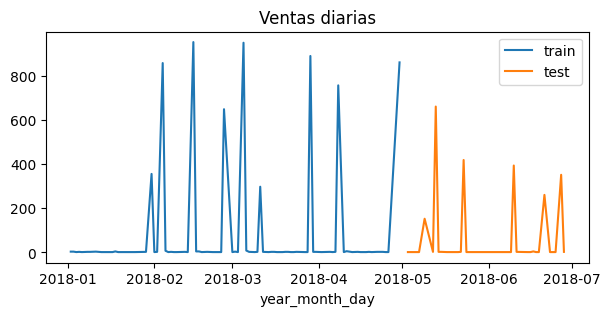

In [20]:
fig, ax=plt.subplots(figsize=(7, 3))
train_orders.plot(ax=ax, label='train')
test_orders.plot(ax=ax, label='test')
ax.set_title('Ventas diarias')
ax.legend();

In [21]:
train_df = pd.DataFrame()
train_df['period'] = train_orders.index
train_df['orders'] = train_orders.values

train_df

,period,orders
0,2018-01-02,3
1,2018-01-03,3
2,2018-01-04,1
3,2018-01-05,2
4,2018-01-06,1
...,...,...
78,2018-04-22,2
79,2018-04-24,2
80,2018-04-25,1
81,2018-04-26,1


In [22]:
train_df

,period,orders
0,2018-01-02,3
1,2018-01-03,3
2,2018-01-04,1
3,2018-01-05,2
4,2018-01-06,1
...,...,...
78,2018-04-22,2
79,2018-04-24,2
80,2018-04-25,1
81,2018-04-26,1


### Distribución diaria de compras

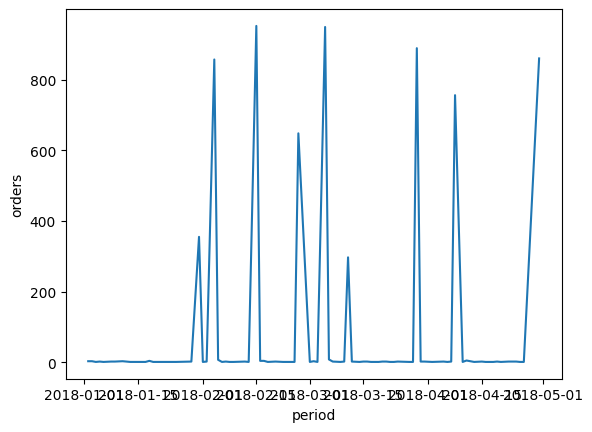

In [23]:
sns.lineplot(train_df, x='period', y='orders')
plt.show()

### Distribución mensual de compras

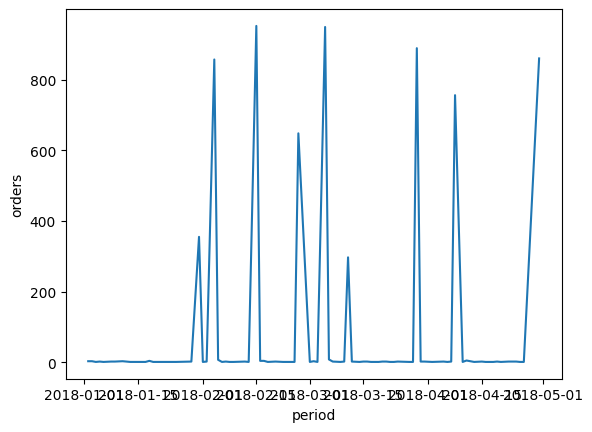

In [24]:
sns.lineplot(train_df, x='period', y='orders')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

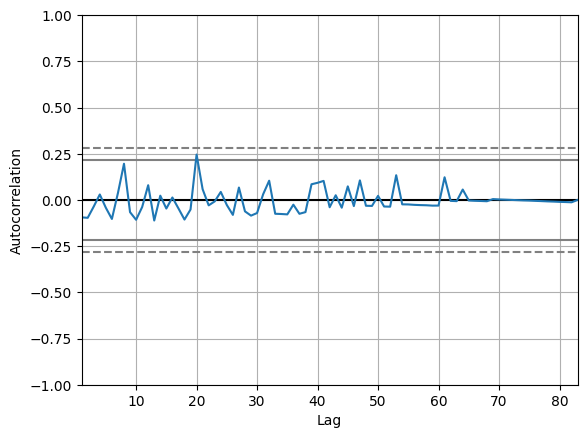

In [25]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train_df['orders'])

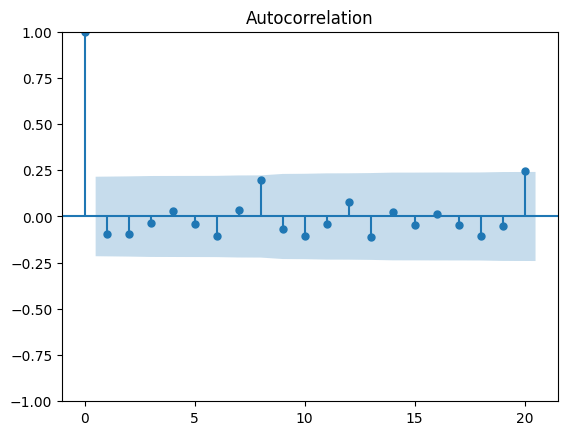

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_df['orders'])
plt.show()

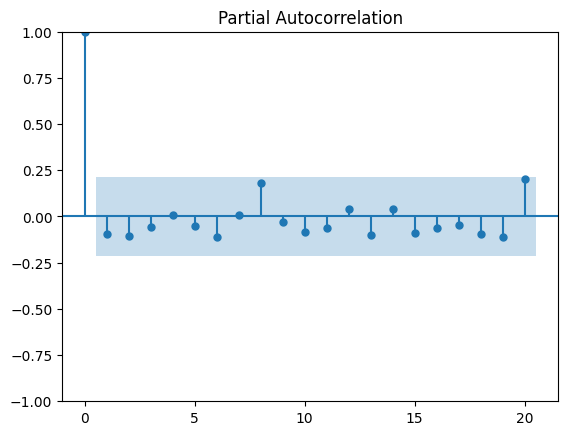

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train_df['orders'])
plt.show()

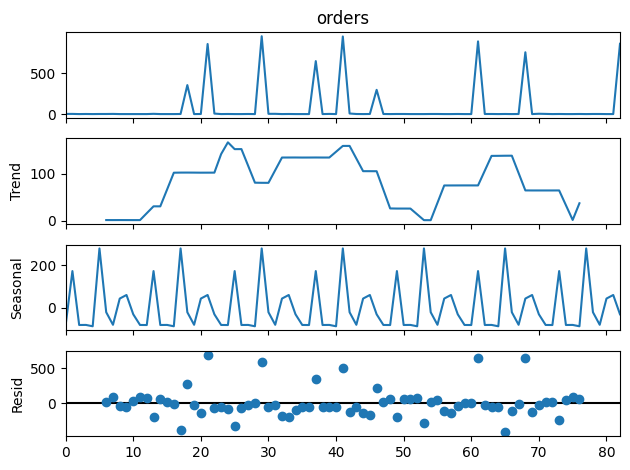

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(train_df['orders'], model='additive', period=12)
decomposition.plot()
plt.show()

### Entrenamos con SARIMA

In [29]:
# Creamos el set de test
test_df = pd.DataFrame()
test_df['period'] = test_orders.index
test_df['orders'] = test_orders.values

test_df.head(10)

,period,orders
0,2018-05-03,1
1,2018-05-04,1
2,2018-05-05,1
3,2018-05-06,1
4,2018-05-07,1
5,2018-05-09,152
6,2018-05-12,2
7,2018-05-13,660
8,2018-05-14,2
9,2018-05-15,2


In [30]:
train_df.head(10)

,period,orders
0,2018-01-02,3
1,2018-01-03,3
2,2018-01-04,1
3,2018-01-05,2
4,2018-01-06,1
5,2018-01-08,2
6,2018-01-09,2
7,2018-01-11,3
8,2018-01-13,1
9,2018-01-14,1


In [86]:
import pmdarima as pmd
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_autoarima = pmd.auto_arima(train_df['orders'],
                     start_p=1,
                     start_q=1,
                     test='adf',
                     m=12,
                     seasonal=True,
                     trace=True)


model_autoarima = SARIMAX(endog = train_orders, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = model_autoarima.fit(disp=0)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1148.565, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1151.338, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1151.171, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1155.531, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1150.029, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1150.067, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1152.067, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1149.724, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1149.453, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1148.467, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1152.040, Time=0.43 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1150.485, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1152.257, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[12]

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [87]:
test_df.head(10)

,period,orders,predicted
0,2018-05-03,1,-33.728953
1,2018-05-04,1,35.459983
2,2018-05-05,1,230.296278
3,2018-05-06,1,30.757425
4,2018-05-07,1,29.593293
5,2018-05-09,152,31.007335
6,2018-05-12,2,278.003176
7,2018-05-13,660,78.866370
8,2018-05-14,2,31.282387
9,2018-05-15,2,128.634351


In [99]:
predictions_statsmodels = modelo_res.get_forecast(steps=len(test_df)).predicted_mean.reset_index()['predicted_mean']

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [100]:
test_df['predicted'] = predictions_statsmodels
test_df.head()

,period,orders,predicted
0,2018-05-03,1,-33.728953
1,2018-05-04,1,35.459983
2,2018-05-05,1,230.296278
3,2018-05-06,1,30.757425
4,2018-05-07,1,29.593293


In [101]:
# Plots the forecasts against the data
melt_df = pd.melt(test_df, ['period'])
melt_df

,period,variable,value
0,2018-05-03,orders,1.000000
1,2018-05-04,orders,1.000000
2,2018-05-05,orders,1.000000
3,2018-05-06,orders,1.000000
4,2018-05-07,orders,1.000000
...,...,...,...
73,2018-06-21,predicted,165.574996
74,2018-06-23,predicted,214.182437
75,2018-06-25,predicted,41.419907
76,2018-06-27,predicted,54.604141


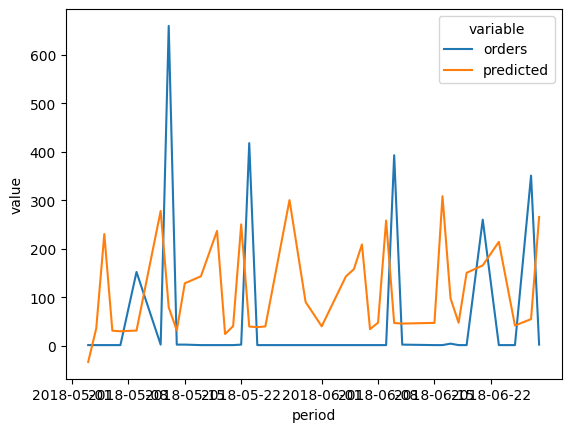

In [102]:
sns.lineplot(melt_df, x='period', y='value', hue='variable')
plt.show()

### Skforecast (es un wrapper de Statsmodels)

In [103]:
from skforecast.Sarimax import Sarimax

In [104]:
modelo_skforecast = Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
modelo_skforecast.fit(y=train_orders)
modelo_skforecast.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              order   No. Observations:                   83
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -496.369
Date:                            Fri, 13 Sep 2024   AIC                           1002.737
Time:                                    17:52:48   BIC                           1013.980
Sample:                                         0   HQIC                          1007.203
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0778      0.246     -0.316      0.752      -0.560       0.405
ma.L1         -0.9999     24.478     -0.041      0.967     -48.976      46.977
ar.S.L12       0.0557      0.120      0.463      0.643      -0.180       0.291
ma.S.L12      -0.9994     24.564     -0.041      0.968     -49.143      47.144
sigma2      5.808e+04      0.000   2.57e+08      0.000    5.81e+04    5.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                61.33
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             1.68
Prob(H) (two-sided):                  0.31   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.24e+26. Standard errors may be unstable.
"""

In [105]:
predictions_skforecast = modelo_skforecast.predict(steps=len(test_orders)).reset_index()['pred']
display(predictions_skforecast.head(10))

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0    -33.728953
1     35.459983
2    230.296278
3     30.757425
4     29.593293
5     31.007335
6    278.003176
7     78.866370
8     31.282387
9    128.634351
Name: pred, dtype: float64

In [106]:
test_df['predicted'] = predictions_skforecast
melt_df = pd.melt(test_df, ['period'])
test_df.head()

,period,orders,predicted
0,2018-05-03,1,-33.728953
1,2018-05-04,1,35.459983
2,2018-05-05,1,230.296278
3,2018-05-06,1,30.757425
4,2018-05-07,1,29.593293


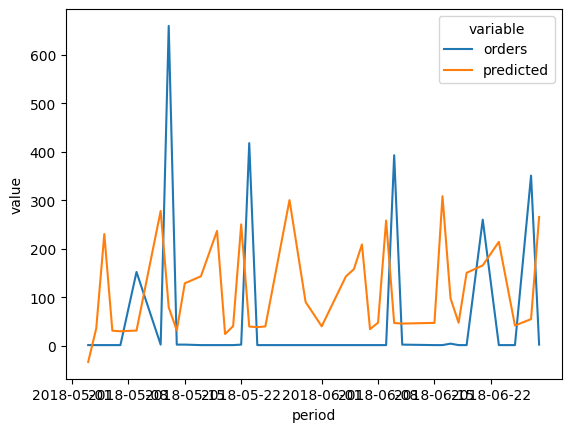

In [107]:
sns.lineplot(melt_df, x='period', y='value', hue='variable')
plt.show()

### Sarimax con pdmarima

In [108]:
from pmdarima import ARIMA

In [109]:
model_pdmarima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_pdmarima.fit(y=train_orders)
model_pdmarima.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -495.992
Date:                            Fri, 13 Sep 2024   AIC                           1003.985
Time:                                    17:52:55   BIC                           1017.476
Sample:                                         0   HQIC                          1009.343
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0633      2.166     -0.491      0.623      -5.308       3.181
ar.L1         -0.1023      0.272     -0.375      0.707      -0.636       0.432
ma.L1         -0.9998      7.924     -0.126      0.900     -16.530      14.530
ar.S.L12       0.0494      0.167      0.297      0.767      -0.277       0.376
ma.S.L12      -0.9912      8.011     -0.124      0.902     -16.693      14.711
sigma2      5.777e+04      0.000   5.34e+08      0.000    5.78e+04    5.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                66.38
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             1.72
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.19e+27. Standard errors may be unstable.
"""

In [111]:
predictions_pdmarima = model_pdmarima.predict(len(test_orders))
predictions_pdmarima.name = 'predicciones_pdmarima'
predictions_pdmarima.head(10)

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


83   -114.504804
84    -12.904670
85    175.384292
86    -29.191935
87    -34.468541
88    -36.819741
89    208.268374
90      3.593552
91    -48.346887
92     46.013600
Name: predicciones_pdmarima, dtype: float64

### Lightgbm

### Plots predicciones

In [122]:
predictions_statsmodels.index = test_orders.index
predictions_skforecast.index = test_orders.index
predictions_pdmarima.index = test_orders.index

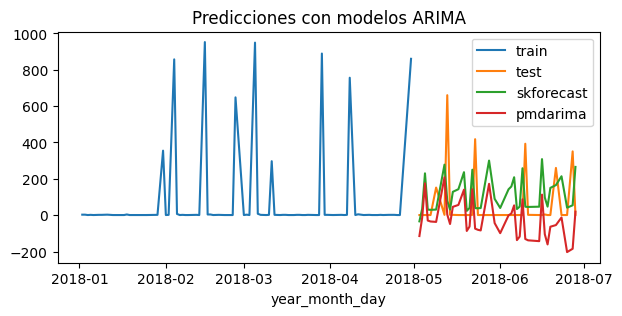

In [126]:
fig, ax = plt.subplots(figsize=(7, 3))
train_orders.plot(ax=ax, label='train')
test_orders.plot(ax=ax, label='test')
predictions_skforecast.plot(ax=ax, label='skforecast')
predictions_pdmarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend();

### REF: https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python